In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv('heatmap_data.csv', sep=';', decimal=',')
df.sort_values(by=['cusum','triple_barrier'],  ascending=[False, False], inplace=True)

In [13]:
df

,cusum,triple_barrier,Annual_Net_Profit_Loss,Accuracy,Sharpe_ratio
87,0.06,0.100,73.7,53.28,1.26
86,0.06,0.090,43.6,54.36,0.91
85,0.06,0.080,33.4,52.12,1.07
84,0.06,0.070,13.1,50.09,-0.30
83,0.06,0.060,6.3,52.42,0.01
...,...,...,...,...,...
4,0.01,0.040,-41.3,52.26,-0.59
3,0.01,0.035,-31.9,51.86,-0.30
2,0.01,0.030,-37.2,52.66,-0.47
1,0.01,0.025,-55.8,51.61,-1.06


In [14]:
# df.pivot("cusum", "triple_barrier", value_column)

In [3]:
cmap = mcolors.LinearSegmentedColormap.from_list("", ["red", "limegreen"])

0 ('Accuracy', 'Accuracy', 52)


/var/folders/9g/0tl60q4d1zbb_1ggbb19w_4c0000gp/T/ipykernel_53633/1229737502.py:12: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



1 ('Sharpe_ratio', 'Sharpe ratio', 1)
2 ('Annual_Net_Profit_Loss', 'Annual Net Profit/Loss', 0)


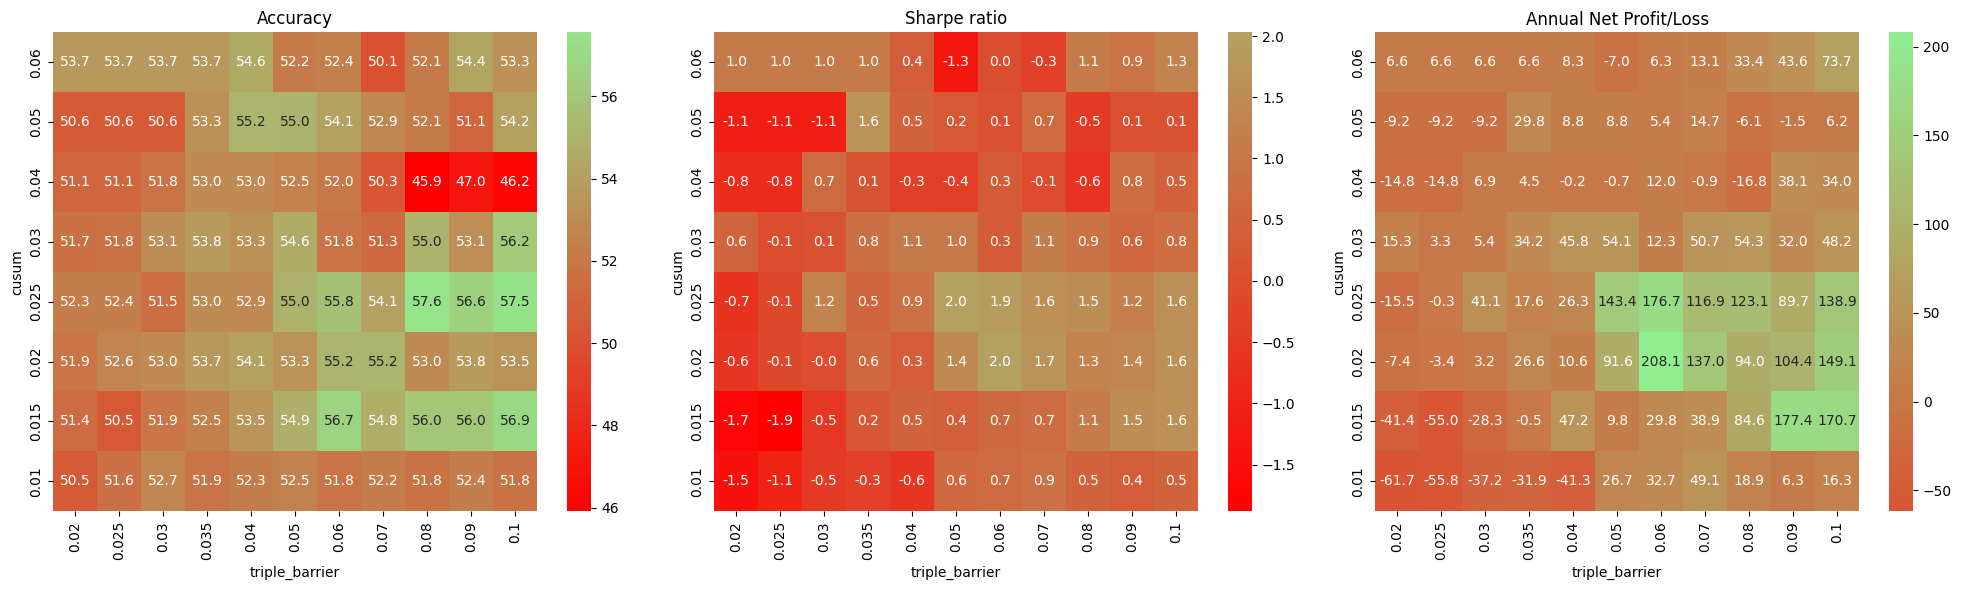

In [16]:

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# List of value columns
value_columns = [ 'Accuracy', 'Sharpe_ratio', 'Annual_Net_Profit_Loss']
label = ['Accuracy', 'Sharpe ratio', 'Annual Net Profit/Loss']
centerfloat = [52, 1, 0]

# Plotting each heatmap
for i, value_tuple in enumerate(zip(value_columns, label, centerfloat)):
    print(i, value_tuple)
    pivot_table = df.pivot("cusum", "triple_barrier", value_tuple[0])
    pivot_table.sort_index(ascending=False, inplace=True)
    sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap=cmap, ax=axes[i], center=value_tuple[2])
    axes[i].set_title(f"{value_tuple[1]}")
    plt.savefig(f'heatmap_plot_{value_tuple[0]}.png', dpi=300, bbox_inches='tight')

plt.tight_layout()

plt.show()


0 ('Accuracy', 'Accuracy', 52)


/var/folders/9g/0tl60q4d1zbb_1ggbb19w_4c0000gp/T/ipykernel_9025/1507555376.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = df.pivot("cusum", "triple_barrier", value_tuple[0])


1 ('Sharpe_ratio', 'Sharpe ratio', 0.8)
2 ('Annual_Net_Profit_Loss', 'Annual Net Profit/Loss', 20)


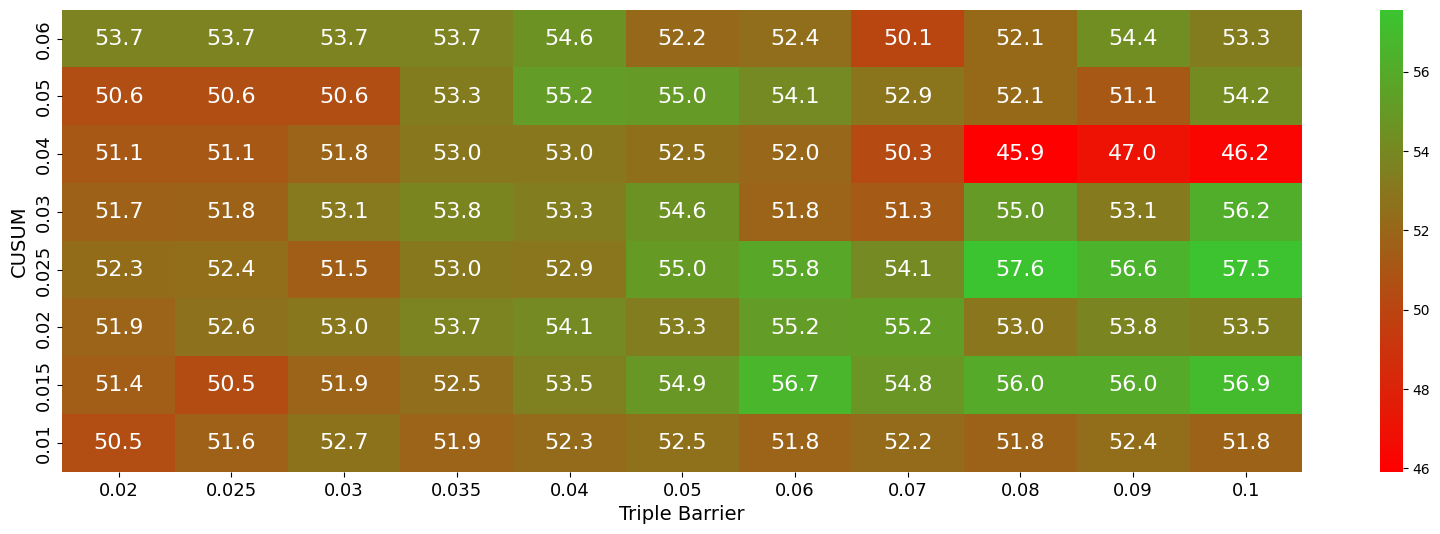

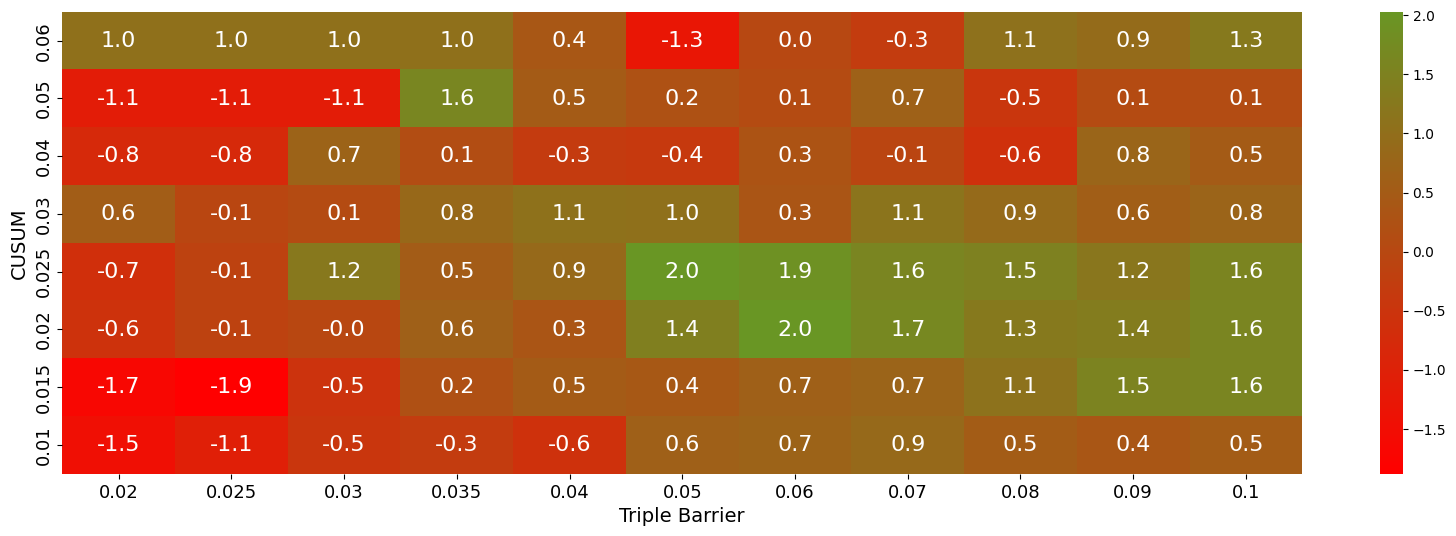

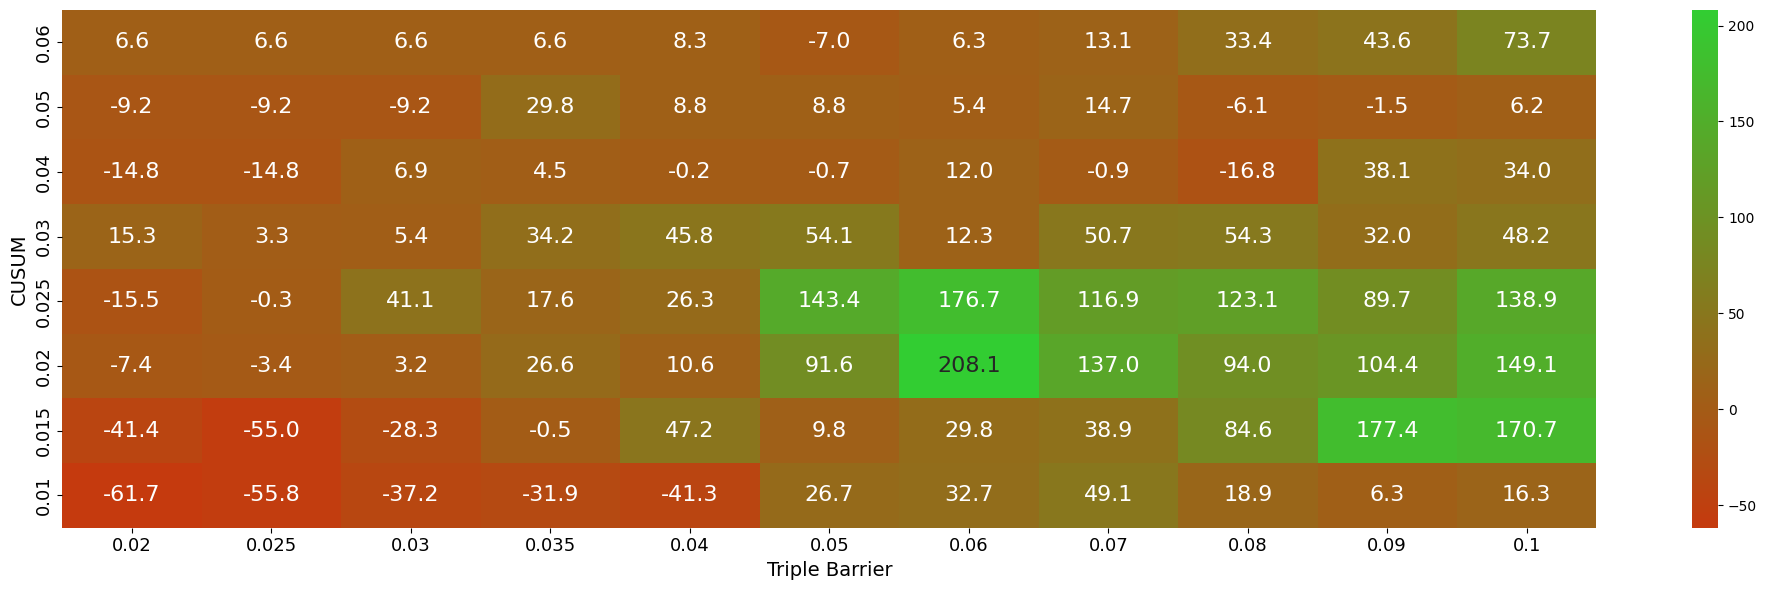

In [9]:


# List of value columns
value_columns = [ 'Accuracy', 'Sharpe_ratio', 'Annual_Net_Profit_Loss']
label = ['Accuracy', 'Sharpe ratio', 'Annual Net Profit/Loss']
centerfloat = [52, 0.8, 20]

# Plotting each heatmap
for i, value_tuple in enumerate(zip(value_columns, label, centerfloat)):
    fig, axes = plt.subplots(1, 1, figsize=(20, 6))
    print(i, value_tuple)
    pivot_table = df.pivot("cusum", "triple_barrier", value_tuple[0])
    pivot_table.sort_index(ascending=False, inplace=True)
    ax = sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap=cmap, ax=axes, center=value_tuple[2], annot_kws={'size': 16})
    ax.set_xlabel('Triple Barrier', fontsize=14)
    ax.set_ylabel('CUSUM', fontsize=14)
    # Set the font size for the tick labels
    ax.tick_params(axis='x', labelsize=13)  # For x-axis
    ax.tick_params(axis='y', labelsize=13)  # For y-axis
        # axes.set_title(f"{value_tuple[1]}")
    plt.savefig(f'heatmap_plot_{value_tuple[0]}.png', dpi=300, bbox_inches='tight')

plt.tight_layout()

plt.show()

# BOX PLOTS

In [8]:
# df = pd.read_csv('boxplot_triple.csv', sep=';', decimal=',')
df = pd.read_csv('boxplot_onestep.csv', sep=';', decimal=',')
df

,Model,Accuracy,Net_profit
0,ResNet-LSTM,52.97,-36.567106
1,ResNet-LSTM,47.81,-26.685704
2,ResNet-LSTM,51.10,-20.821008
3,ResNet-LSTM,51.00,-26.850015
4,ResNet-LSTM,49.37,-38.375400
...,...,...,...
175,XGBoost,50.22,-34.691507
176,XGBoost,50.08,-44.336365
177,XGBoost,51.23,-85.835025
178,XGBoost,51.53,-38.059578


In [9]:
df['Accuracy'] = df['Accuracy'] /100
df['Net_profit'] = df['Net_profit'] /100

In [10]:
# Initialize subplot with 1 row and 2 columns
color = '#0000ff'
fig = make_subplots(rows=1, cols=2)

# Add box plot for data1 in the first column
for model in df['Model'].unique():
    fig.add_trace(go.Box(y=df[df['Model'] == model]['Accuracy'],
                         name=model, boxmean=True, marker_color=color),
                  row=1, col=1)

fig.add_shape(type='line',
              x0=0, x1=1, xref='x domain',  # Use 'x domain' for spanning the subplot width
              y0=0.5, y1=0.5, yref='y1',  # Emphasized value for the first subplot
              line=dict(color='grey', width=1, dash='solid'),
              row=1, col=1)
# Add box plot for data2 in the second column
for model in df['Model'].unique():
    fig.add_trace(go.Box(y=df[df['Model'] == model]['Net_profit'],
                         name=model, boxmean=True, marker_color=color),
                  row=1, col=2)

fig.add_shape(type='line',
              x0=0, x1=1, xref='x domain',  # Use 'x domain' for spanning the subplot width
              y0=0, y1=0, yref='y1',  # Emphasized value for the first subplot
              line=dict(color='grey', width=1, dash='solid'),
              row=1, col=2)
# Update layout for a cleaner look
fig.update_layout(height=600, width=1200,  showlegend=False)
fig.update_layout(
    plot_bgcolor='rgba(255, 255, 255, 1)',  # Light gray background for the plot area
    paper_bgcolor='rgba(255, 255, 255, 1)',  # White background for the entire figure,
)
# Update x-axis and y-axis for the first subplot
fig.update_xaxes(showline=True, linecolor='lightgrey', showgrid=True, gridcolor='lightgrey', row=1, col=1, mirror=True)
fig.update_yaxes(showline=True, linecolor='lightgrey', showgrid=True, gridcolor='lightgrey', row=1, col=1, mirror=True, tickformat='.0%')

# Update x-axis and y-axis for the second subplot
fig.update_xaxes(showline=True, linecolor='lightgrey', showgrid=True, gridcolor='lightgrey', row=1, col=2, mirror=True)
fig.update_yaxes(showline=True, linecolor='lightgrey', showgrid=True, gridcolor='lightgrey', row=1, col=2, mirror=True, tickformat='.0%') 
# fig.write_image("box_plot_triple.png",  scale=3)
fig.write_image("box_plot_onestep.png",  scale=3)
fig.show()